In [2]:
## importing the required packages
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import offsetbox
from sklearn.manifold import TSNE
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from ggplot import *
from collections import Counter
## Loading and curating the data

C:\Users\Neha Mane\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Neha Mane\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\Neha Mane\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
df = pd.read_csv('temp_single_cell.txt', sep='\t')

In [4]:
df.head()

,gene_name,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,BC06_Pooled,BC07_Tumor,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,TFPI,0.04,17.61,0.27,88.27,32.64,79.54,26.71,11.88,29.65,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,21.15,4.77,0.0
1,SLC7A2,73.57,22.60,16.29,4.14,1.40,0.38,1.86,0.00,1.97,...,0.0,0.0,0.0,0.0,1.63,0.0,0.0,0.06,0.00,0.0
2,CD38,0.00,19.33,0.78,16.31,111.30,0.63,0.00,9.51,9.70,...,0.0,0.0,6.1,0.0,0.00,0.0,0.0,0.24,0.00,0.0
3,MPO,0.00,0.00,0.99,10.92,6.88,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
4,ABCB4,0.79,5.71,0.44,0.00,5.14,7.84,0.06,0.28,2.37,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0


In [5]:
gene_name = df.gene_name

In [6]:
df.drop(df.columns[[0]],axis=1,inplace=True)

In [7]:
df.head()

,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,BC06_Pooled,BC07_Tumor,BC07LN_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,0.04,17.61,0.27,88.27,32.64,79.54,26.71,11.88,29.65,12.37,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,21.15,4.77,0.0
1,73.57,22.60,16.29,4.14,1.40,0.38,1.86,0.00,1.97,0.00,...,0.0,0.0,0.0,0.0,1.63,0.0,0.0,0.06,0.00,0.0
2,0.00,19.33,0.78,16.31,111.30,0.63,0.00,9.51,9.70,11.88,...,0.0,0.0,6.1,0.0,0.00,0.0,0.0,0.24,0.00,0.0
3,0.00,0.00,0.99,10.92,6.88,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0
4,0.79,5.71,0.44,0.00,5.14,7.84,0.06,0.28,2.37,4.25,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0


In [8]:
df = df.fillna(0)

In [9]:
df.astype('float64')

,BC01_Pooled,BC01_Tumor,BC02_Pooled,BC03_Pooled,BC03LN_Pooled,BC04_Pooled,BC05_Pooled,BC06_Pooled,BC07_Tumor,BC07LN_Pooled,...,BC11_04,BC11_07,BC11_28,BC11_43,BC11_56,BC11_69,BC11_70,BC11_78,BC11_81,BC11_88
0,0.04,17.61,0.27,88.27,32.64,79.54,26.71,11.88,29.65,12.37,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21.15,4.77,0.00
1,73.57,22.60,16.29,4.14,1.40,0.38,1.86,0.00,1.97,0.00,...,0.00,0.00,0.00,0.00,1.63,0.00,0.00,0.06,0.00,0.00
2,0.00,19.33,0.78,16.31,111.30,0.63,0.00,9.51,9.70,11.88,...,0.00,0.00,6.10,0.00,0.00,0.00,0.00,0.24,0.00,0.00
3,0.00,0.00,0.99,10.92,6.88,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.79,5.71,0.44,0.00,5.14,7.84,0.06,0.28,2.37,4.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
5,0.00,2.36,0.44,0.00,0.35,0.00,0.19,0.80,1.75,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.33,1.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.00,60.66,0.86,8.01,5.42,...,0.00,0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00,0.00,0.39,0.94,0.23,0.00,...,0.00,5.66,0.15,26.24,0.00,0.00,0.00,0.00,0.00,0.00
9,0.00,0.00,6.83,0.28,3.41,1.64,2.70,1.55,1.70,0.00,...,0.00,68.27,0.00,2.43,0.00,0.00,213.30,0.00,0.00,4.19


In [10]:
df = df.transpose()

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,536,537,538,539,540,541,542,543,544,545
BC01_Pooled,0.04,73.57,0.00,0.00,0.79,0.00,0.0,0.0,0.0,0.00,...,33.63,3.99,1.32,5.73,0.00,12.16,30.76,1.08,0.00,1.14
BC01_Tumor,17.61,22.60,19.33,0.00,5.71,2.36,0.0,0.0,0.0,0.00,...,41.73,2.69,0.00,5.43,0.00,7.00,12.42,0.00,2.01,0.00
BC02_Pooled,0.27,16.29,0.78,0.99,0.44,0.44,0.0,0.0,0.0,6.83,...,111.39,0.76,0.00,56.20,9.47,12.41,162.13,0.00,0.45,26.50
BC03_Pooled,88.27,4.14,16.31,10.92,0.00,0.00,0.0,0.0,0.0,0.28,...,23.71,0.00,18.73,0.00,0.00,3.83,2.37,14.98,0.00,62.51
BC03LN_Pooled,32.64,1.40,111.30,6.88,5.14,0.35,0.0,0.0,0.0,3.41,...,0.65,1.25,5.70,4.53,0.61,2.23,0.00,29.93,2.44,798.69


In [12]:
arr = np.asarray(df, dtype=np.float32)

In [13]:
arr.shape

(563, 546)

In [14]:
np.isnan(arr).any()

False

In [15]:
## Computing t-SNE
print("Computing t-SNE embedding")
#tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
#t0 = time()
#X_tsne = tsne.fit_transform(df)
X_embedded = TSNE(n_components=2).fit_transform(arr)
X_embedded.shape

Computing t-SNE embedding


(563, 2)

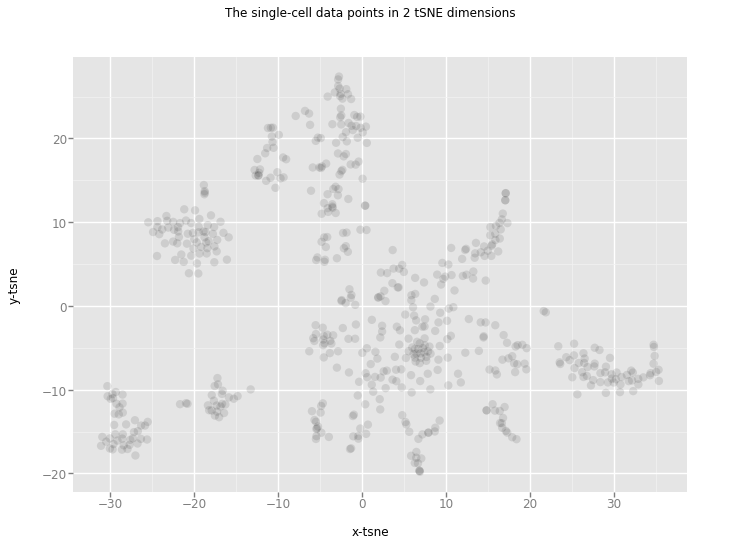

<ggplot: (173669412742)>

In [16]:
df['x-tsne'] = X_embedded[:,0]
df['y-tsne'] = X_embedded[:,1]

chart = ggplot(df, aes(x='x-tsne', y='y-tsne') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("The single-cell data points in 2 tSNE dimensions")
chart

In [17]:
db = DBSCAN(eps=3.3, min_samples=15).fit(X_embedded)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [213]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [214]:
print('Estimated number of clusters: %d' % n_clusters_)
#print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
#print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
#print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
#print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
#print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_embedded, labels))


Estimated number of clusters: 9
Silhouette Coefficient: 0.398


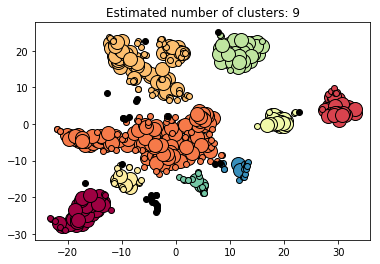

In [215]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X_embedded[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X_embedded[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [216]:
labels

array([ 3,  3,  3, -1,  0,  1, -1,  0,  0,  0,  0,  0,  2,  2,  3,  3,  3,
        3,  3,  3,  3,  2,  3,  2,  3, -1,  2,  3,  3,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  2,  3,  3,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  2,  0,  3,  3,  3, -1,
        3,  3,  3,  3,  3, -1,  2,  3,  0,  3,  3,  3,  3,  3,  2,  2,  2,
        0,  2,  2,  0,  2,  2,  2, -1,  2,  0,  2,  0,  0,  2,  0,  4,  3,
        0, -1,  0,  4,  0,  0,  3,  0, -1,  3,  3,  0,  0, -1,  0,  0, -1,
        3,  0,  0,  4,  0,  0, -1,  4,  4,  4,  2,  2,  3, -1,  3,  4,  2,
        0,  0,  0,  0, -1,  0,  0,  2,  0,  2,  2,  0,  0,  2,  3,  2,  4,
        0,  1,  5,  5,  2,  1, -1,  1,  5,  1,  5,  5,  1,  1,  2,  5,  1,
        1,  5,  1,  5,  1,  5,  1,  1,  1,  5,  1,  1,  1,  5,  5,  5,  1,
        1,  5,  5,  1,  5

In [217]:
print(Counter(labels))

Counter({2: 181, 3: 110, 6: 62, 0: 56, 1: 42, -1: 29, 5: 24, 4: 22, 7: 19, 8: 18})


In [218]:
df['clusterType'] = labels

In [219]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,539,540,541,542,543,544,545,x-tsne,y-tsne,clusterType
BC01_Pooled,0.04,73.57,0.00,0.00,0.79,0.00,0.0,0.0,0.0,0.00,...,5.73,0.00,12.16,30.76,1.08,0.00,1.14,-2.467857,18.914146,3
BC01_Tumor,17.61,22.60,19.33,0.00,5.71,2.36,0.0,0.0,0.0,0.00,...,5.43,0.00,7.00,12.42,0.00,2.01,0.00,-2.490066,23.256710,3
BC02_Pooled,0.27,16.29,0.78,0.99,0.44,0.44,0.0,0.0,0.0,6.83,...,56.20,9.47,12.41,162.13,0.00,0.45,26.50,-5.451637,18.767559,3
BC03_Pooled,88.27,4.14,16.31,10.92,0.00,0.00,0.0,0.0,0.0,0.28,...,0.00,0.00,3.83,2.37,14.98,0.00,62.51,-7.188147,6.786520,-1
BC03LN_Pooled,32.64,1.40,111.30,6.88,5.14,0.35,0.0,0.0,0.0,3.41,...,4.53,0.61,2.23,0.00,29.93,2.44,798.69,-17.404501,-27.440596,0


In [231]:
avg_df = pd.DataFrame()

In [232]:
for i in range(len(set(labels)) - 1):
    df2 = df.loc[df['clusterType'] == i]
    df3 = df2.mean(axis=0)
    avg_df = avg_df.append(df3, ignore_index=True)

C:\Users\Neha Mane\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  after removing the cwd from sys.path.


In [233]:
avg_df

,0,1,2,3,4,5,6,7,8,9,...,539,540,541,542,543,544,545,clusterType,x-tsne,y-tsne
0,1.761786,0.103750,120.971250,0.545179,3.743393,0.173571,0.135714,0.660893,0.119464,0.674107,...,6.561250,3.055714,4.464821,2.194643,37.228929,14.791786,832.245714,0.0,-17.188156,-23.995964
1,54.366190,0.012619,0.094524,0.010952,0.868810,0.007619,0.000000,0.209762,0.033571,11.550476,...,18.449524,4.235238,90.829048,3.230952,0.000000,8.018571,3.403333,1.0,29.914388,4.871452
2,26.145856,0.315193,8.587790,0.173481,5.972928,0.203039,2.875359,5.356796,0.605856,1.702210,...,20.354365,3.200773,6.178453,9.030884,2.983702,17.441160,114.336409,2.0,-3.864028,-4.545655
3,37.777545,20.069364,0.998182,2.884364,1.088455,0.088000,0.104636,5.191364,0.071364,6.249091,...,116.678091,12.241909,11.447000,117.261818,0.238182,0.882364,22.493000,3.0,-5.211973,16.196111
4,19.759545,0.002727,82.270909,0.007273,9.462273,0.040455,0.000000,0.025455,0.037273,0.000000,...,0.610455,41.087727,36.950455,0.000000,18.145909,9.339545,1788.850455,4.0,-9.314803,-14.927633
5,20.712500,0.017917,0.067917,0.000000,0.000000,2.337917,10.701667,0.000000,0.000000,7.371667,...,8.225000,10.482500,15.159583,0.000000,0.010417,1.137083,28.898333,5.0,18.892980,0.981926
6,17.876613,0.206613,0.000000,0.000000,3.284516,0.075484,0.000000,52.603387,0.058065,5.807903,...,69.776452,0.203871,31.595968,10.332097,0.000000,2.815968,133.166613,6.0,11.585944,19.725750
7,11.139474,0.000000,61.587895,0.000000,16.787368,0.000000,0.000000,0.000000,0.585263,9.633684,...,6.247895,0.002105,0.114737,0.414211,0.015263,8.443158,245.575263,7.0,3.778626,-16.161258
8,0.030000,0.000000,66.545000,0.000000,0.000000,0.000000,0.092778,0.000000,0.053333,0.017222,...,0.092778,20.055556,0.000000,4.322778,65.008333,4.636667,167.571111,8.0,11.741244,-12.177481


In [234]:
avg_df = avg_df.drop(columns = ['clusterType', 'x-tsne', 'y-tsne'],axis=1)

In [235]:
avg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,536,537,538,539,540,541,542,543,544,545
0,1.761786,0.103750,120.971250,0.545179,3.743393,0.173571,0.135714,0.660893,0.119464,0.674107,...,38.234286,0.859821,1.721607,6.561250,3.055714,4.464821,2.194643,37.228929,14.791786,832.245714
1,54.366190,0.012619,0.094524,0.010952,0.868810,0.007619,0.000000,0.209762,0.033571,11.550476,...,72.099524,22.540000,44.201667,18.449524,4.235238,90.829048,3.230952,0.000000,8.018571,3.403333
2,26.145856,0.315193,8.587790,0.173481,5.972928,0.203039,2.875359,5.356796,0.605856,1.702210,...,58.999945,1.224641,2.012155,20.354365,3.200773,6.178453,9.030884,2.983702,17.441160,114.336409
3,37.777545,20.069364,0.998182,2.884364,1.088455,0.088000,0.104636,5.191364,0.071364,6.249091,...,320.172909,1.169000,21.193455,116.678091,12.241909,11.447000,117.261818,0.238182,0.882364,22.493000
4,19.759545,0.002727,82.270909,0.007273,9.462273,0.040455,0.000000,0.025455,0.037273,0.000000,...,4.808636,5.640455,12.639545,0.610455,41.087727,36.950455,0.000000,18.145909,9.339545,1788.850455


In [236]:
avg_df = avg_df.transpose()

In [237]:
avg_df.head()

,0,1,2,3,4,5,6,7,8
0,1.761786,54.366190,26.145856,37.777545,19.759545,20.712500,17.876613,11.139474,0.030
1,0.103750,0.012619,0.315193,20.069364,0.002727,0.017917,0.206613,0.000000,0.000
2,120.971250,0.094524,8.587790,0.998182,82.270909,0.067917,0.000000,61.587895,66.545
3,0.545179,0.010952,0.173481,2.884364,0.007273,0.000000,0.000000,0.000000,0.000
4,3.743393,0.868810,5.972928,1.088455,9.462273,0.000000,3.284516,16.787368,0.000


In [238]:
avg_df.shape

(546, 9)

In [239]:
def logTPM(x):
    return np.log2(x+1)

In [240]:
avg_df = avg_df.apply(logTPM)

In [241]:
avg_df.insert(0, 'gene_name', gene_name)

In [242]:
avg_df.head()

,gene_name,0,1,2,3,4,5,6,7,8
0,TFPI,1.465601,5.790933,4.762660,5.277150,4.375703,4.440454,4.238528,3.601634,0.042644
1,SLC7A2,0.142413,0.018092,0.395275,4.397075,0.003929,0.025619,0.270963,0.000000,0.000000
2,CD38,6.930397,0.130303,3.261198,0.998688,6.379741,0.094799,0.000000,5.967812,6.077777
3,MPO,0.627774,0.015715,0.230794,1.957678,0.010454,0.000000,0.000000,0.000000,0.000000
4,ABCB4,2.245919,0.902120,2.801765,1.062436,3.387124,0.000000,2.099132,4.152781,0.000000


In [243]:
avg_df.to_csv('singleCellMatrix.txt', sep='\t',index=False)